## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
file = "/content/Play Store Data.csv"
df= pd.read_csv(file)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.shape

(10841, 13)

In [ ]:
## print the list of columns of dataframe
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
## Find the total number of null values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
## function to find the median value of series
def median_data(column):
  return column.fillna(column.median())

In [ ]:
## As we know Rating should not exceed 5 , so find the row of dat of Rating more than 5 and drop that row.
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472],inplace=True)

In [ ]:
## In Rating we will fill the null value with the median data of Rating column
df.Rating= df['Rating'].transform(median_data)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
## Fill the null values of the column of Type,Current Ver, Android Ver, with the mode value of the respective column.

df['Type'].fillna(str(df['Type'].mode()),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode()),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode()),inplace=True)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
## In the given data we have some character which needs to be remove from the dataset.

df['Installs']=df['Installs'].str.replace('[+,$M]',"")
df['Size']=df['Size'].str.replace('[+,$M]',"")
df['Price']=df['Price'].str.replace('[+,$M]',"")
df['Reviews']=df['Reviews'].str.replace('[+,$M]',"")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
## Converting the datatype of the following column so that we can use the data.

df['Reviews']=df['Reviews'].astype(float)
df['Price']=df['Price'].astype(float)
df['Installs']=df['Installs'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [ ]:
# Q1 Which category has the maximum number of apps in market share?

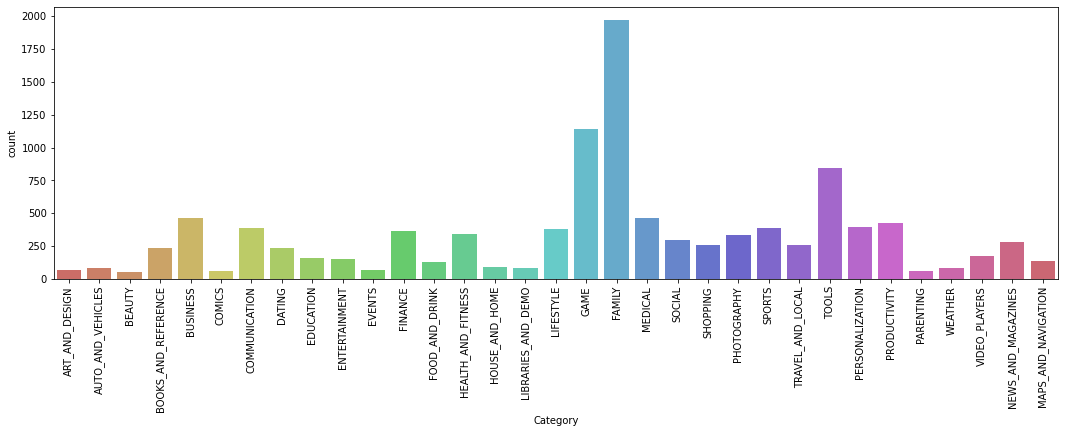

In [ ]:
plt.figure(figsize=(18,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

 

In [ ]:
## from above chart we can infer that we have maximum number of app of catergory 'Family'.

In [ ]:
# Q2 market share of free and paid apps
#

In [ ]:
# Change the data of row 
df[df.Type=='0    Free\ndtype: object']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0.0,Varies with device,0.0,0 Free\ndtype: object,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df['Type'].iloc[9148]='Free'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


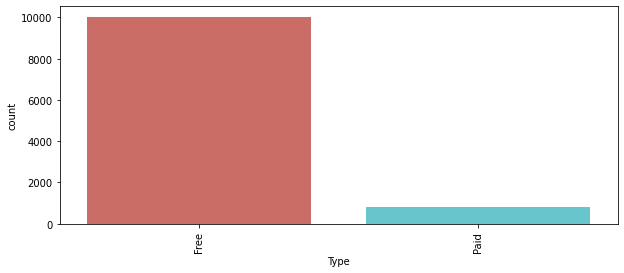

In [ ]:
plt.figure(figsize=(10,4))
fig = sns.countplot(x=df['Type'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)


In [ ]:
## from above information we can infer that maximun number of Apps in market are Free. 


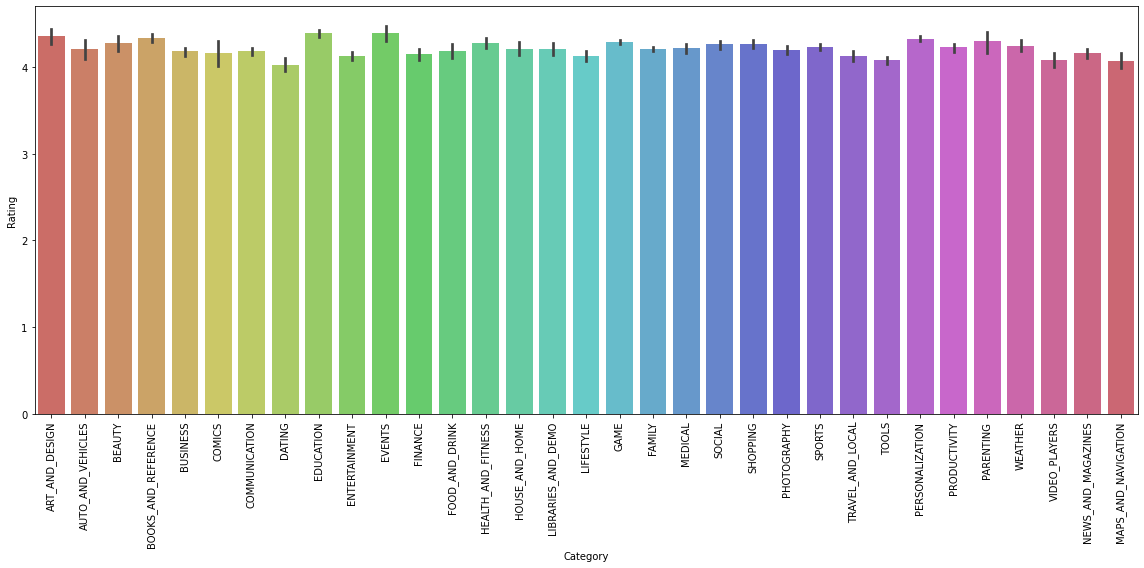

In [ ]:
## Q3 which category of Apps has maximum mean ratings?
plt.figure(figsize=(16,8))
fig = sns.barplot(x=df['Category'], y=df['Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

RATINGS


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


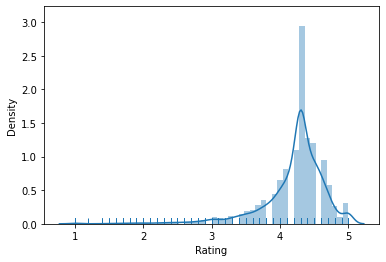

In [ ]:
## Apps rating lies in which range ?
## most of them lies in between 3-4.5 ratings not more than 4.5

sns.distplot(df.Rating, hist=True, rug= True,)
plt.show()

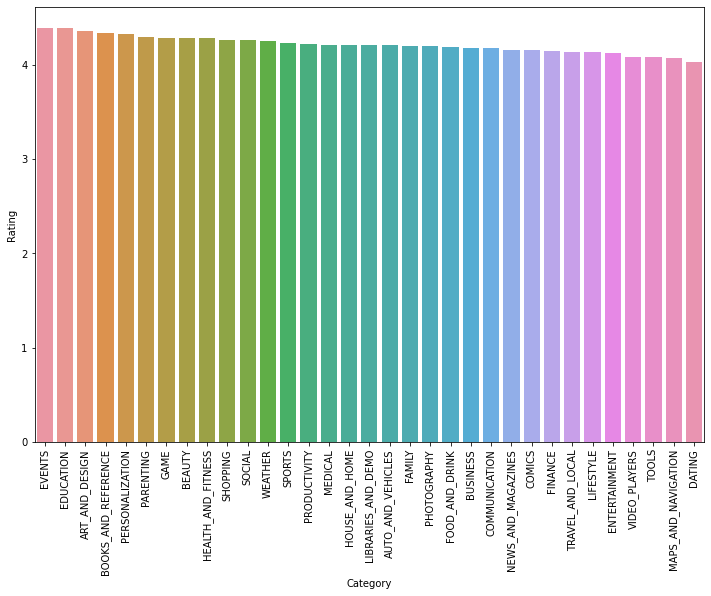

In [ ]:
## Q4 which category has maximum or minimum mean rating ?

plt.figure(figsize=(12,8))
rating_mean=df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
graph=sns.barplot(y=rating_mean, x=rating_mean.index, data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show(graph)

In [ ]:
## Event category app has maximum mean value and Dating app has minimum mean

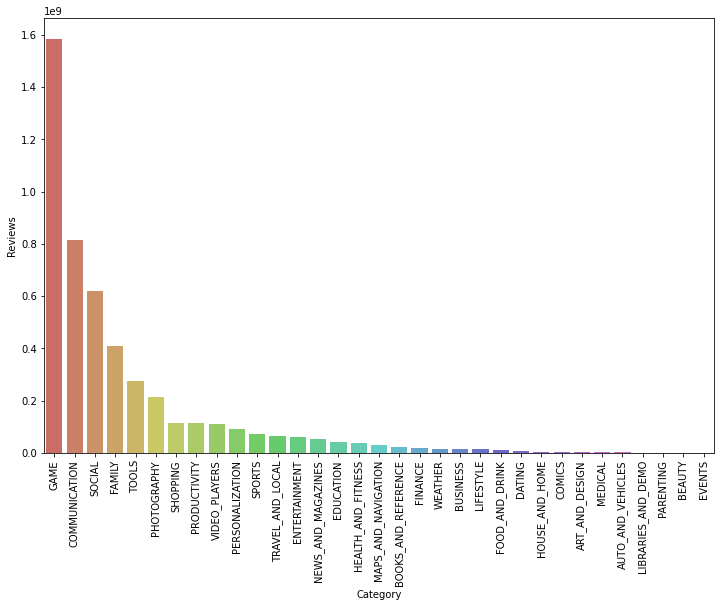

In [ ]:
## Q5 Which Categories of app people likes to review more ?

plt.figure(figsize=(12,8))
sum_rew = df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
graph2=sns.barplot(y=sum_rew, x=sum_rew.index, data=df,palette='hls')
graph2.set_xticklabels(graph2.get_xticklabels(),rotation=90)
plt.show(graph2)

In [ ]:
## Game app category has the maximum no reviews , that means people like to review more on game app even though gane apps are not the biggest market share.

In [ ]:
## Which are the top 10 expensive Apps in the play store?

In [ ]:
df_paid= df[(df.Type == 'Paid')].sort_values(by='Price', ascending=False)


In [ ]:
df_paid.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Earnings
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,4000000.0
5359,I am rich(premium),FINANCE,3.5,472.0,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,1999950.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up,399990.0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,3999900.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0
5358,I am Rich!,FINANCE,3.8,93.0,22,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,399990.0
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,1999950.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,3999900.0
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,399990.0


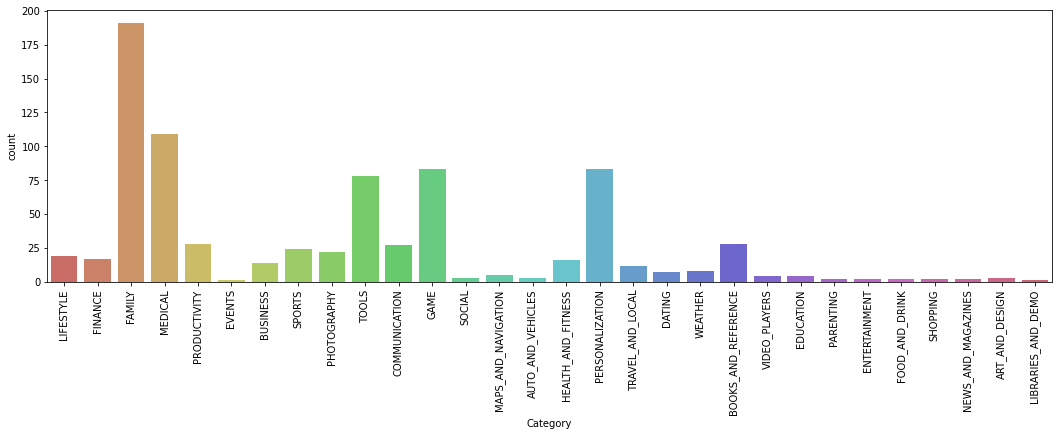

In [ ]:
## Find the maximum number of paid apps with respect to category?
plt.figure(figsize=(18,5))
fig = sns.countplot(x=df_paid['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [ ]:
## Family app category has the maximum number of paid app.

In [ ]:
## Which are the top earning Apps in the paid apps category in playstore?

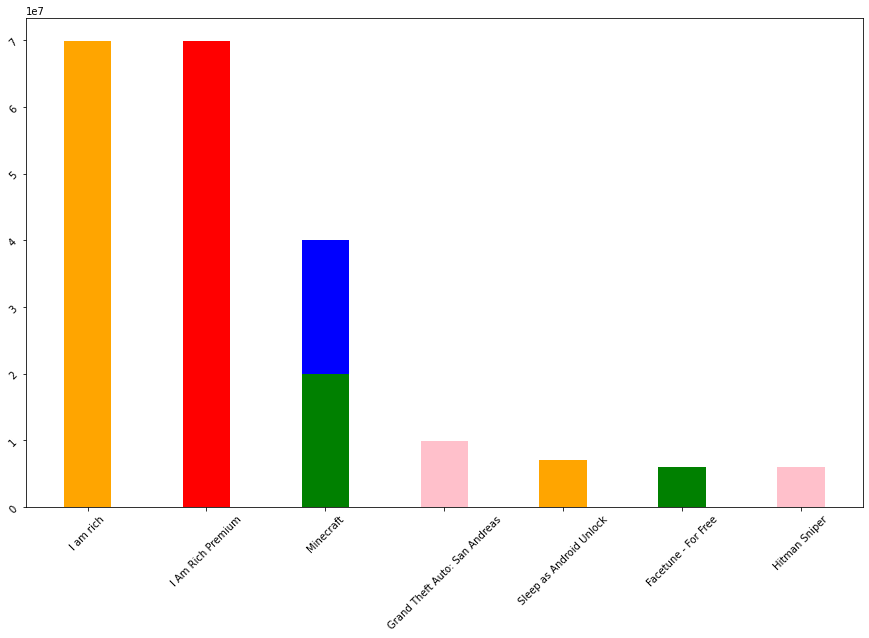

In [ ]:
df['Earnings'] = df['Installs'] * df['Price'];
Earnings_sort = df.sort_values(by='Earnings', ascending=False).head(10)
Price_sort = Earnings_sort.sort_values(by='Price', ascending=False)
plt.figure(figsize=(15,9))
plt.bar(Price_sort.App, Earnings_sort.Earnings, width=0.4, color = ['orange', 'red', 'blue', 'green', 'pink'])
plt.tick_params(rotation=45)
plt.show()


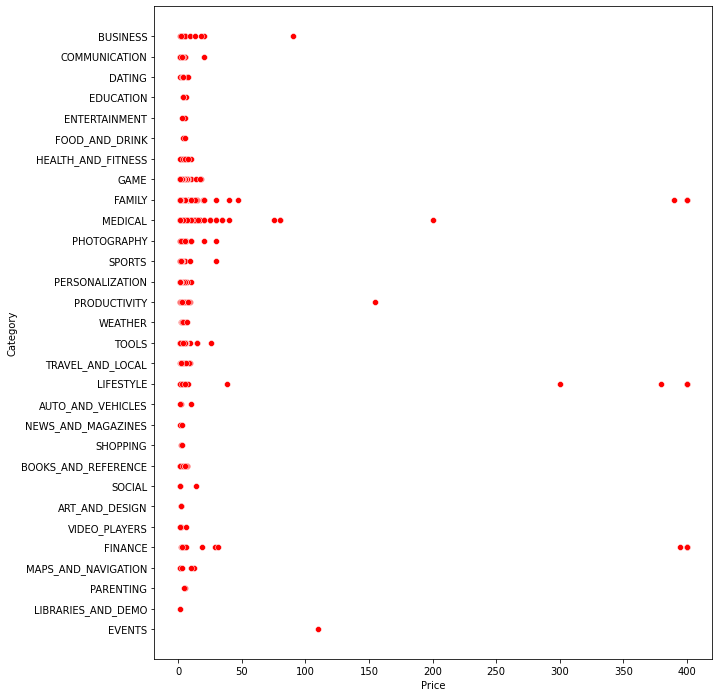

In [ ]:
## Distribution of paid apps with respect to category
plt.figure(figsize=(10,12)) 
sns.scatterplot(data=df[df.Price>0],y="Category",x='Price',color="Red") 
plt.show()

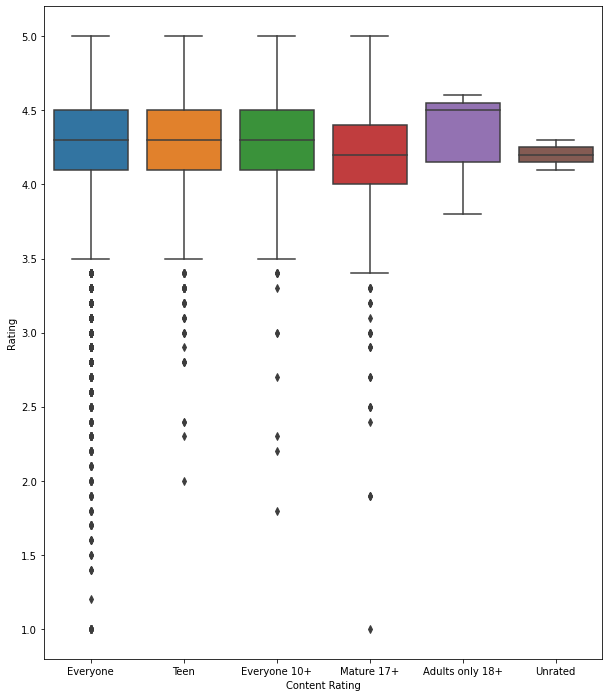

In [ ]:
plt.figure(figsize=(10,12))
ax=sns.boxplot(x="Content Rating",y="Rating",data=df)
plt.show()

In [ ]:
##  Find How many app support  of version 4?

def android_ver_4(version):
    try:
        if version.startswith('4'):
            return True
        else:
            return False
    except:
        return np.nan
df['is_ver_4'] = df['Android Ver'].apply(android_ver_4)


In [ ]:
len(df[df['is_ver_4'] == True])

6959

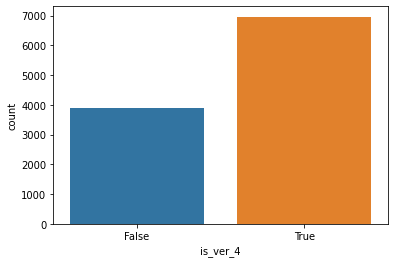

In [ ]:
sns.countplot(x = 'is_ver_4', data = df)


In [ ]:
## 
df2 = df.sort_values(by = ['Reviews'],ascending = False).head(15)
df_top_reviews = df2.head(15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


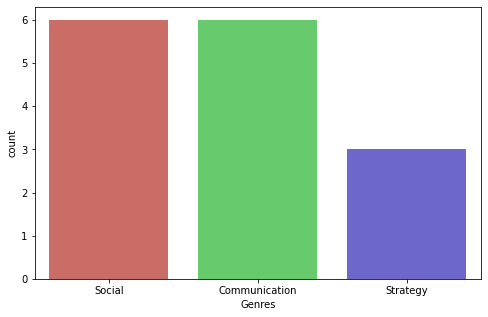

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df_top_reviews.Genres,palette='hls')
plt.yticks(fontsize = 10,)
plt.xticks( fontsize = 10,)
plt.show()

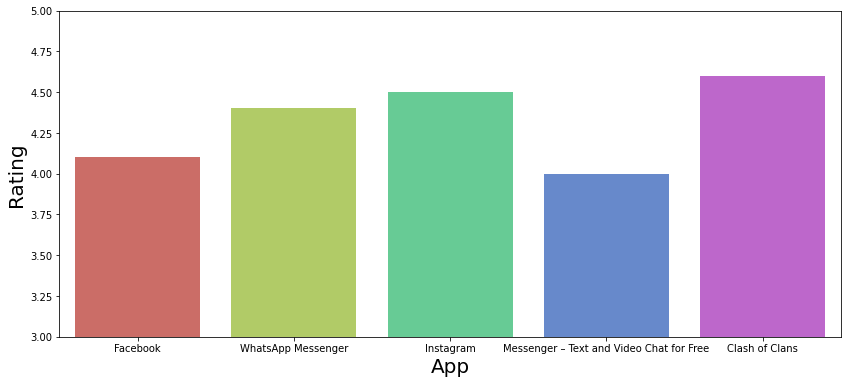

In [ ]:
## find the top 
plt.figure(figsize=(14,6))
sns.barplot(x = df_top_reviews['App'],y = df_top_reviews['Rating'],palette='hls')
plt.yticks(fontsize = 10)
plt.xticks( fontsize = 10)
plt.xlabel('App',fontsize = 20)
plt.ylabel('Rating',fontsize = 20)
plt.ylim((3,5))
plt.show()